In [68]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn2_unweighted
import os
import seaborn as sns
import numpy as np

### Functions

In [69]:
def read_multiple_csv(folder, prefix):
    all_dfs = []
    for filename in os.listdir(folder):
        if filename.startswith(prefix):
            file_path = os.path.join(folder, filename)
            df = pd.read_csv(file_path)
            all_dfs.append(df)
    merged_df = pd.concat(all_dfs, ignore_index=True)
    return(merged_df)

### Combining Exp Data

In [70]:
prot_exp = pd.read_csv('SourceData/prot_exp_data.csv')
meta_exp = pd.read_csv('SourceData/meta_exp_data.csv')

In [71]:
prot_exp.shape

(708, 6904)

In [72]:
meta_exp.shape

(620, 413)

In [73]:
combined_outer = pd.merge(prot_exp, meta_exp, on=['RID','AGE','PTGENDER',
                                                'APOE4', 'PTEDUCAT'], how='outer')
combined_outer.shape

(723, 7312)

In [74]:
combined_inner = pd.merge(prot_exp, meta_exp, on=['RID','AGE','PTGENDER',
                                                'APOE4', 'PTEDUCAT','DX.bl'], how='inner')
combined_inner.shape

(605, 7311)

In [75]:
combined_inner

,RID,X10000.28,X10001.7,X10003.15,X10006.25,X10008.43,X10010.10,X10011.65,X10012.5,X10014.31,...,X999925271,X999925422,X999925520,X999925790,X999925855,X999925936,X999925948,X999925957,X999925983,X999926062
0,4521,1.310421e+00,1.564750e+00,-0.029270,0.338239,0.172844,-0.062360,0.199556,-5.959430e-01,-1.014925e+00,...,-1.604472,0.460901,0.534346,0.048239,1.516711,1.440699e+00,0.717656,-0.967510,1.329858,0.346270
1,4488,-5.392761e-02,-7.330680e-01,-0.759819,1.549274,0.377533,1.200031,0.822422,-8.385415e-02,3.882343e-01,...,0.393781,0.838729,0.710377,-1.199481,0.000000,2.595109e-02,0.465246,-0.035938,-0.490221,0.890037
2,4516,-5.883357e-15,-1.661512e-01,-2.344702,0.689727,-2.226109,1.157316,-0.185695,1.190070e+00,-2.001990e+00,...,0.233864,0.119591,0.173377,-0.891982,-0.121223,4.505175e-01,0.287255,0.289813,-0.757414,0.341505
3,4530,1.900540e+00,-5.984978e-01,0.622327,-0.639343,1.158421,-0.577022,-0.071078,-4.149629e-01,-1.403547e+00,...,-1.604472,-0.740243,0.381163,-0.030997,-0.150420,-1.062556e+00,-1.927718,1.019896,-1.533040,1.431746
4,4462,-8.187144e-01,-3.063405e-01,-0.670879,1.981747,-0.977259,-2.196091,0.060342,-7.219177e-01,-8.578163e-01,...,-0.674029,-0.478915,0.167546,-0.404112,0.360482,1.274749e-02,-0.547882,0.278260,-0.164769,1.539501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600,892,-3.971742e-01,2.690528e-02,1.009825,-2.522048,0.808148,-1.725119,-1.286070,8.025993e-02,-4.080522e-02,...,0.571760,-0.039989,0.049558,-0.254104,0.629536,7.894791e-01,2.077016,1.856814,-0.350515,-0.772005
601,1290,1.783923e-01,-5.174537e-01,1.431127,-0.797446,-1.137383,0.312815,-1.606760,2.004348e+00,9.893535e-15,...,0.253857,-0.232227,1.178255,0.855143,-0.887510,2.619170e+00,0.727086,-0.276776,0.888218,1.882268
602,438,1.207926e+00,-5.948492e-15,-0.014900,-1.901192,-0.370854,-2.054073,0.354994,8.337977e-01,-6.866522e-02,...,-1.604472,1.274313,-0.751444,1.584717,-0.425830,1.557148e+00,2.308979,-0.963964,-0.334082,-0.772005
603,459,2.264864e+00,9.504740e-01,1.498339,-1.097550,0.883534,0.487864,-1.436327,-7.780868e-01,-2.222898e-01,...,-0.548780,1.457644,-1.152929,0.793769,-0.097379,-1.155354e-17,2.524105,-0.181670,-0.119101,1.038438


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/matplotlib_venn/_util.py:32: UserWarning: venn2_unweighted is deprecated. Use venn2 with the appropriate layout_algorithm instead.
  warnings.warn(


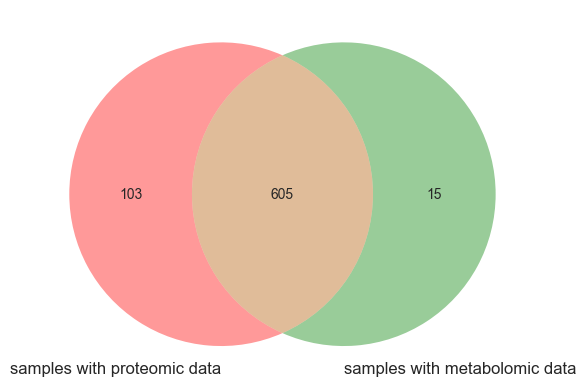

In [76]:
venn2_unweighted(subsets = (103, 15, 605), set_labels = ('samples with proteomic data', 'samples with metabolomic data'))
plt.show()

In [77]:
combined_inner.to_csv('SourceData/combined_exp_data.csv', index=False)

In [78]:
combined_inner[['DX.bl']].value_counts()

DX.bl
MCI      339
CN       145
AD       121
Name: count, dtype: int64

### Combining DE proteins and metabolites

In [86]:
# Read files and combine in a single dataframe
de_meta = read_multiple_csv('Results/multi', 'de_meta').rename(columns={'PLOT_NAME':'Name'})
de_meta['type'] = 'metabolite'

de_prots = read_multiple_csv('Results/multi', 'de_proteins').rename(columns={'EntrezGeneSymbol':'Name'})
de_prots['type'] = 'protein'

de_comps = pd.concat([de_meta,de_prots])
de_comps['annotation'] = de_comps['Name'] + ' | ' + de_comps['Compound']
de_comps.to_csv('Results/multi/de_compounds.csv', index=False)
de_comps

/var/folders/mh/p8rsw7z90bv6kv8r8qnf4tnr0000gn/T/ipykernel_27297/4085417398.py:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  merged_df = pd.concat(all_dfs, ignore_index=True)


,Compound,Estimate,StdErr,z_score,p_value,padj_fdr,-log10(fdr),auc_score,Compare,Name,type,annotation
0,X1084,-0.420637,0.117804,-3.570660,3.560826e-04,3.623140e-02,1.440915,0.721958,MCIvsAD,N-acetylvaline,metabolite,N-acetylvaline | X1084
1,X1090,0.488638,0.134101,3.643796,2.686463e-04,3.623140e-02,1.440915,0.724713,MCIvsAD,bilirubin,metabolite,bilirubin | X1090
2,X100002154,-0.447421,0.119436,-3.746128,1.795850e-04,3.623140e-02,1.440915,0.721982,MCIvsAD,ergothioneine,metabolite,ergothioneine | X100002154
3,X100020361,0.438732,0.122796,3.572840,3.531299e-04,3.623140e-02,1.440915,0.713425,MCIvsAD,3-amino-2-piperidone,metabolite,3-amino-2-piperidone | X100020361
4,X1084,-0.618726,0.162049,-3.818134,1.344650e-04,1.824242e-02,1.738917,0.825249,CNvsAD,N-acetylvaline,metabolite,N-acetylvaline | X1084
...,...,...,...,...,...,...,...,...,...,...,...,...
71,X8997.4,-0.790422,0.149734,-5.278836,1.300069e-07,5.571149e-05,4.254055,0.830686,CNvsAD,NPTXR,protein,NPTXR | X8997.4
72,X9266.1,0.822873,0.169099,4.866224,1.137508e-06,3.411535e-04,3.467050,0.827042,CNvsAD,TREM1,protein,TREM1 | X9266.1
73,X9599.6,-0.538745,0.137410,-3.920708,8.828924e-05,9.666971e-03,2.014710,0.810032,CNvsAD,PIANP,protein,PIANP | X9599.6
74,X9884.8,0.608685,0.150184,4.052924,5.058139e-05,6.230543e-03,2.205474,0.815760,CNvsAD,PPIL1,protein,PPIL1 | X9884.8


#### Correlation Heatmap

In [80]:
de_prot_exp = prot_exp[de_prots.Compound]
de_meta_exp = meta_exp[de_meta.Compound]

de_exp = combined_inner[de_comps.Compound]
de_exp

,X1084,X1090,X100002154,X100020361,X1084,X100001851,X100002154,X10479.18,X12414.31,X14156.33,...,X6361.49,X6521.35,X8070.88,X8235.48,X8479.4,X8997.4,X9266.1,X9599.6,X9884.8,X9900.36
0,1.468697,0.102706,1.156543,1.131452,1.468697,0.770269,1.156543,2.139829e+00,1.072448,1.139351,...,1.477632,0.546675,2.369652,1.501831,1.063080,0.029790,-0.377059,0.475920,0.747135,1.122776
1,0.276340,-1.585510,-0.129522,0.619385,0.276340,-0.116378,-0.129522,1.926272e-01,-1.175869,-0.566141,...,0.349566,0.113217,-1.433374,-0.376908,1.427767,0.438797,0.296053,-0.055658,-0.885049,-1.318552
2,-0.386183,-1.585510,-0.534253,-0.720177,-0.386183,-0.207632,-0.534253,-2.155047e-01,-1.275524,-1.024589,...,0.779398,0.846505,0.746653,-0.077422,0.570951,0.571333,-0.537343,0.598309,-1.341615,-0.859730
3,-1.745379,-1.585510,1.746855,-1.173428,-1.745379,-1.864430,1.746855,-5.546286e-01,0.276579,0.222636,...,-1.298435,-1.505929,-0.301811,0.701482,-0.966275,-1.341125,0.168596,-1.141330,-0.019081,-0.098586
4,-0.596943,-1.585510,0.738124,-0.540534,-0.596943,-0.401417,0.738124,3.385407e-01,-0.012317,-0.028570,...,0.269341,-0.312357,-0.520461,0.857844,1.427767,-0.200778,1.400633,-0.842683,-0.253674,-0.405918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600,2.718196,1.269160,-1.890028,0.525402,2.718196,1.517968,-1.890028,1.868216e+00,1.417988,1.086680,...,-0.060772,0.256620,1.068231,-0.355950,-0.484174,0.436891,-0.059231,0.513284,1.714269,0.736459
601,0.477322,-1.585510,-0.108782,0.194513,0.477322,0.652311,-0.108782,-8.121225e-16,0.040038,-0.290838,...,-0.260872,-0.378562,0.030155,-0.939861,-0.267743,-0.900341,-0.444387,-0.286562,-0.444569,0.051159
602,-0.457112,0.656772,0.429408,1.929625,-0.457112,0.612991,0.429408,2.068961e-01,1.958468,1.552488,...,0.760765,0.400259,1.525664,-0.013429,-0.966275,-0.073121,-0.537343,0.340201,1.510293,1.161533
603,2.749958,0.623277,0.097312,1.456274,2.749958,2.532086,0.097312,4.125520e-01,0.486410,0.223092,...,1.549450,2.091988,1.207765,0.820968,-0.862741,1.007388,-0.896680,1.045482,0.659391,0.440209


In [81]:
heatmap_data = de_exp.corr(method='pearson')
heatmap_data = heatmap_data[de_meta.Compound].drop(de_meta.Compound)
heatmap_data

,X1084,X1084,X1090,X100002154,X100002154,X100020361,X1084,X1084,X100001851,X100002154,X100002154
X10479.18,0.099877,0.099877,0.263843,-0.048197,-0.048197,0.141115,0.099877,0.099877,0.075589,-0.048197,-0.048197
X12414.31,0.390833,0.390833,0.177551,-0.001365,-0.001365,0.133007,0.390833,0.390833,0.419867,-0.001365,-0.001365
X14156.33,0.400814,0.400814,0.185118,0.035084,0.035084,0.156194,0.400814,0.400814,0.424576,0.035084,0.035084
X15333.11,0.136057,0.136057,-0.199567,0.030995,0.030995,-0.118143,0.136057,0.136057,0.167924,0.030995,0.030995
X21721.6,0.543264,0.543264,-0.046384,0.031520,0.031520,-0.023607,0.543264,0.543264,0.568064,0.031520,0.031520
...,...,...,...,...,...,...,...,...,...,...,...
X8997.4,0.504114,0.504114,-0.121999,0.071118,0.071118,-0.121400,0.504114,0.504114,0.570583,0.071118,0.071118
X9266.1,-0.003539,-0.003539,0.091900,-0.000657,-0.000657,0.212816,-0.003539,-0.003539,-0.025288,-0.000657,-0.000657
X9599.6,0.608109,0.608109,-0.071963,0.088039,0.088039,-0.020293,0.608109,0.608109,0.677776,0.088039,0.088039
X9884.8,-0.018103,-0.018103,-0.043952,-0.083362,-0.083362,0.072243,-0.018103,-0.018103,-0.020909,-0.083362,-0.083362


In [82]:
# Renaming rows and columns
name_map = dict(zip(de_comps['Compound'], de_comps['annotation']))
heatmap_data = heatmap_data.rename(index=name_map, columns=name_map)

# Remove duplicate rows and columns
heatmap_data = heatmap_data.drop_duplicates()
heatmap_data = heatmap_data.T.drop_duplicates().T

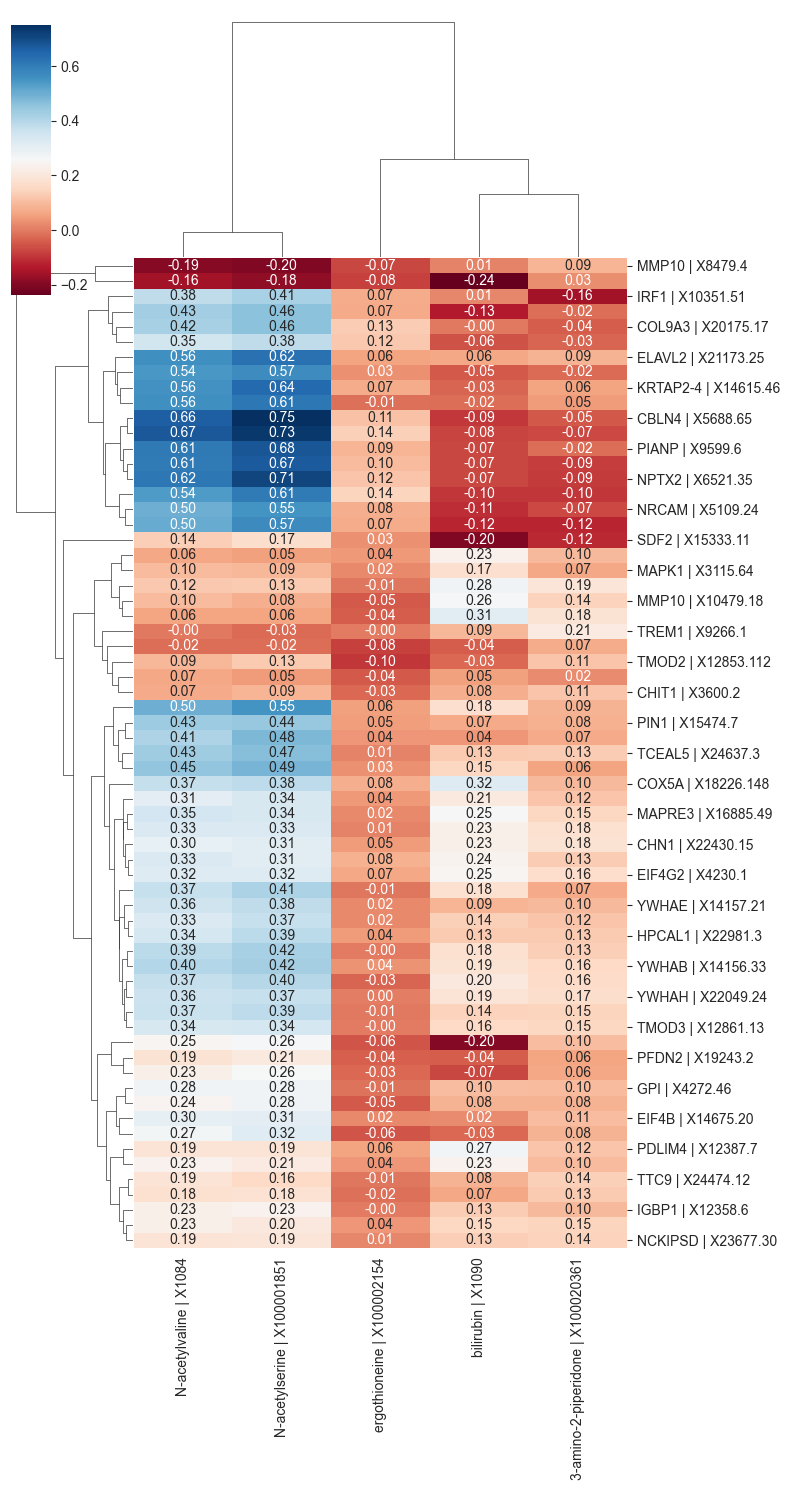

In [83]:
sns.clustermap(heatmap_data, cmap='RdBu', annot=True, fmt=".2f", figsize=(8,15))

In [84]:
#de_exp = combined_inner[de_comps.Compound] + combined_inner[['RID', 'AGE', 'PTGENDER', 'APOE4', 'PTEDUCAT', 'DX.bl']]
#de_exp.to_csv('results/multi/de_exp_data.csv', index=False)